# **Machine Learning 🤔**

In [71]:
%load_ext watermark
%watermark -v -m -p numpy,ray,pandas,sklearn
# shift + tab for more info

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.14.0

numpy  : 1.26.0
ray    : 2.4.0
pandas : 1.5.3
sklearn: 1.2.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.2.0-34-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit



In [277]:
import os
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy
import io
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

try:
    import modin.pandas as pd
    import ray 
    ray.init()
except Exception as e: 
    import pandas as pd

## **Numpy Exercise**

<img src="https://cdn.icon-icons.com/icons2/2699/PNG/512/numpy_logo_icon_168073.png" width="350"/>

In [73]:
# Create an array with values as list
array = np.array([
    [1, 2, 3], [4, 5, 6], [7, 8, 9]
])
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [74]:
# Create a null vector of shape as parameter
array = np.zeros((3, 3)) # (row, column)
array

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [75]:
# Shape and memory
print(array.shape)
print(array.size * array.itemsize)

(3, 3)
72


In [76]:
# Information of numpy 
np.info(array)

class:  ndarray
shape:  (3, 3)
strides:  (24, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x561d817b5970
byteorder:  little
byteswap:  False
type: float64


In [77]:
# Modify the array
array = np.zeros((3, 3))
array[2][1] = 4
array[2, 0] = 3  # best respresentation
array[[1, 0], [2, 1]] = 1  # for x, y in zip(list1, list2)
try:
    array[3][0] = 1
except Exception as e:
    print(e)
array

index 3 is out of bounds for axis 0 with size 3


array([[0., 1., 0.],
       [0., 0., 1.],
       [3., 4., 0.]])

In [78]:
# Creating a numpy array with values ranging from a to b & reshape
array = np.arange(0, 9).reshape(3, 3)
array

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [79]:
 # reverse the order of row [0, n-1] -> [n-1, 0, -1]
print(array[::-1]) 

# reverse the order of columns [0, n-1] -> [n-1, 0, -1]
print(array[:, ::-1]) 

[[6 7 8]
 [3 4 5]
 [0 1 2]]
[[2 1 0]
 [5 4 3]
 [8 7 6]]


In [80]:
# Identity matrix with dtype
array = np.eye(3, dtype=np.int32)
array

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int32)

In [81]:
# 2d array with 1 on the borders
array = np.ones((5, 5))
array[1:-1, 1:-1] = 0
array


array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

In [82]:
# Pad and array
array = np.ones((3, 3))
array = np.pad(array,  pad_width=1, mode='constant', constant_values=2)
array

array([[2., 2., 2., 2., 2.],
       [2., 1., 1., 1., 2.],
       [2., 1., 1., 1., 2.],
       [2., 1., 1., 1., 2.],
       [2., 2., 2., 2., 2.]])

In [83]:
# np.nan Expression
print(
    0 * np.nan,
    np.nan == np.nan,
    np.inf > np.nan,
    np.inf < np.nan,
    np.nan - np.nan,
    0.3 == 0.1 * 3,
    sep='\n'
)

nan
False
False
False
nan
False


In [84]:
# 5*5 matrix with values 1,2,3,4 just below diagnol
array = np.diag((1, 2, 3, 4), k=-1) # k is the shift 
array 

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

In [85]:
# checkboard pattern
array = np.zeros((8, 8))
array[0:-1:2,0:-1:2] = 1
array[1::2, 1::2] = 1
array

array([[1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.]])

In [86]:
# unravel the numpy array 
print(np.unravel_index(10, array.shape))

# tile function
print(np.tile(
    np.array([[0, 1], [1, 0]]), reps=(4, 4)
))

(1, 2)
[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [87]:
# set random seed => value doesn't change
np.random.seed(42)

# Generate Random numpy array
array = np.random.random((3, 3))
print(array)

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]]


In [88]:
# Calculate the metrics
# -1, -2, ... from the x-axis(row wise), y-axiz(column wise), ...
print(array.min(), array.max(), array.mean(), array.std())
print(array.min(-1), array.max(-1), array.mean(-1), array.std(-1), sep='\n')

0.05808361216819946 0.9507143064099162 0.4992549757478559 0.30888608340705315
[0.37454012 0.15599452 0.05808361]
[0.95071431 0.59865848 0.86617615]
[0.68574946 0.30355721 0.50845826]
[0.23748416 0.20866811 0.3363454 ]


In [89]:
# Normalize = (x - x_mean)/(x_std)
array = np.random.random((4, 3))
array = (array - np.mean(array))/(np.std(array)) 
array

array([[ 0.95784693, -1.49297371,  1.89126849],
       [ 1.40121275, -0.80938924, -0.91816886],
       [-0.91253796, -0.48176452,  0.30434471],
       [-0.02651794, -0.52815482,  0.61483417]])

In [90]:
# Custom Dtype
color = np.dtype([
    ("r", np.ubyte, 1),
    ("g", np.ubyte, 1),
    ("b", np.ubyte, 1),
    ("a", np.ubyte, 1),
])

color

dtype([('r', 'u1'), ('g', 'u1'), ('b', 'u1'), ('a', 'u1')])

In [91]:
colors = np.array(
    [
        (255, 0, 0, 255),
        (0, 255, 0, 255),
    ],
    dtype=color
)

# Access the fields by name
print(colors['r'])
print(colors['g']) 
print(colors['b']) 
print(colors['a'])

[255   0]
[  0 255]
[0 0]
[255 255]


In [92]:
# Matrix Product
array1, array2 = np.ones((3,2)), np.ones((2, 1))
print(np.dot(array1, array2))
print(array1 @ array2)

[[2.]
 [2.]
 [2.]]
[[2.]
 [2.]
 [2.]]


In [93]:
# conditions
array = np.arange(11)
indices = (3 < array) & (8 > array)
array[indices] *= -1
indices, array

(array([False, False, False, False,  True,  True,  True,  True, False,
        False, False]),
 array([ 0,  1,  2,  3, -4, -5, -6, -7,  8,  9, 10]))

In [94]:
# calculate sum() from start=-1 and np.sum() calclates along axis -1
sum(range(5),-1), np.sum(range(5),-1)

(9, 10)

In [95]:
# astype() + conditions
array = np.arange(-2, 2).reshape((2, 2)).astype(np.float32)
print(
    array,
    array**array,  # 0**0 = 1
    2 << array.astype(np.int32) >> 2,
    array < -array,
    1j*array,
    array/1/1,
    sep="\n"
)

[[-2. -1.]
 [ 0.  1.]]
[[ 0.25 -1.  ]
 [ 1.    1.  ]]
[[0 0]
 [0 1]]
[[ True  True]
 [False False]]
[[-0.-2.j -0.-1.j]
 [ 0.+0.j  0.+1.j]]
[[-2. -1.]
 [ 0.  1.]]


In [96]:
# conditions

print(
    np.array(0) / np.array(0),
    np.array(0) // np.array(0),
    np.array([np.nan]).astype(int).astype(float),
    sep="\n"
)

nan
0
[-9.22337204e+18]


In [97]:
# round away from zero a float array
array = np.random.uniform(-10, 10, 10)
array2 = np.copysign(np.ceil(np.abs(array)), array)
array, array2

(array([-7.21012279, -4.15710703, -2.67276313, -0.87860032,  5.70351923,
        -6.00652436,  0.28468877,  1.84829138, -9.07099175,  2.15089704]),
 array([ -8.,  -5.,  -3.,  -1.,   6.,  -7.,   1.,   2., -10.,   3.]))

In [98]:
# intersection
array1 = np.random.randint(0, 10, 10)
array2 = np.random.randint(0, 10, 10)

print(
    np.intersect1d(array1, array2),
    np.union1d(array1, array2)
)

[1 3 4 6] [0 1 2 3 4 6 7 8 9]


In [99]:
# ignore errors + emath(scimath)
"""
defaults = np.seterr(all="ignore")
<-- code --> 
_ = np.seterr(**defaults)
"""

with np.errstate(all="ignore"):
    print(np.sqrt(-1), np.emath.sqrt(-1))
    array = np.ones(1) / 0
    print(array)

nan 1j
[inf]


In [100]:
# Datetime
print(
    yesterday := np.datetime64('today', 'D') - np.timedelta64(1, 'D'),
    today := np.datetime64('today', 'D'),
    tomorrow := np.datetime64('today', 'D') + np.timedelta64(1, 'D'),
    sep='\n'
)

array = np.arange('2023-03-17', '2023-08-29', dtype='datetime64[M]')
print(array)


2023-10-11
2023-10-12
2023-10-13
['2023-03' '2023-04' '2023-05' '2023-06' '2023-07']


In [101]:
# ((A+B)*(-A/2))
A = np.ones(3)*1
B = np.ones(3)*2
(A+B)*(-A/2)

# Other method 
np.add(A,B, out=B)
np.divide(A, 2, out=A)
np.negative(A, out=A)
np.multiply(A, B, out=A)
A

array([-1.5, -1.5, -1.5])

In [102]:
# Extract signs and integer parts
array = np.random.uniform(-10, 10, 10)
print(
    array,
    array - array%1,
    np.floor(array),
    np.ceil(array),
    np.trunc(array),
    sep="\n",
)

[ 5.10722821 -1.49688251 -5.84116674  1.35400656 -9.37373415  6.84569549
 -1.00491733 -2.09699528  8.53317732  4.54543992]
[  5.  -2.  -6.   1. -10.   6.  -2.  -3.   8.   4.]
[  5.  -2.  -6.   1. -10.   6.  -2.  -3.   8.   4.]
[ 6. -1. -5.  2. -9.  7. -1. -2.  9.  5.]
[ 5. -1. -5.  1. -9.  6. -1. -2.  8.  4.]


In [103]:
# array with row values rangin from 0-4
array = np.zeros((5, 5))
array[:] = np.arange(5) # array += np.arange(5)
array

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

In [104]:
# build and array from generator
def generate():
    for x in range(10):
        yield x

array = np.fromiter(
    generate(), dtype=np.float32  # range() function are supported
)
array

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [105]:
# array sotring
array = np.random.randint(0, 10, 5)
array.sort()
array

array([4, 6, 7, 7, 8])

In [106]:
# make immutable
array = np.zeros(10)
array.flags.writeable=False
try:
    array[0]=2
except Exception as e:
    print(e)
finally:
    print(array)

assignment destination is read-only
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [107]:
array = np.arange(0, 100000, 10000)

%time np.prod(array[1:])
%time np.multiply.reduce(array[1:])

CPU times: user 0 ns, sys: 47 µs, total: 47 µs
Wall time: 51.3 µs
CPU times: user 0 ns, sys: 13 µs, total: 13 µs
Wall time: 16.2 µs


4125042171973730304

In [108]:
# comparison
A = np.array([1.0, 2.0, 3.0])
B = np.array([1.0, 2.0000001, 3.0])
print(
    A, B,
    A==B,
    np.allclose(A, B),
    np.array_equal(A, B),
    sep='\n'
)

[1. 2. 3.]
[1.        2.0000001 3.       ]
[ True False  True]
True
False


In [109]:
# stacking
array1 = np.random.randint(0, 10, 9).reshape((3, 3))
array2 = np.random.randint(0, 10, 9).reshape((3, 3))

array1, array2, np.column_stack((array1, array2)), np.vstack((array1, array2))

(array([[1, 4, 7],
        [9, 8, 8],
        [0, 8, 6]]),
 array([[8, 7, 0],
        [7, 7, 2],
        [0, 7, 2]]),
 array([[1, 4, 7, 8, 7, 0],
        [9, 8, 8, 7, 7, 2],
        [0, 8, 6, 0, 7, 2]]),
 array([[1, 4, 7],
        [9, 8, 8],
        [0, 8, 6],
        [8, 7, 0],
        [7, 7, 2],
        [0, 7, 2]]))

In [110]:
# random 10*2 matrix representing cartesian cordinates -> convert them to polar coordinates
cartesian_cordinates = np.random.random((5, 2))
x, y = cartesian_cordinates[:, 0], cartesian_cordinates[:, 1]
polar_cordinates = np.column_stack(( # or np.vstack()
    np.sqrt(x**2 + y**2),  # r
    np.arctan2(y, x) # theta
))
cartesian_cordinates, polar_cordinates

(array([[0.79017554, 0.60595997],
        [0.92630088, 0.65107703],
        [0.91495968, 0.85003858],
        [0.44945067, 0.09541012],
        [0.37081825, 0.66884125]]),
 array([[0.99577351, 0.65420923],
        [1.13222551, 0.61265527],
        [1.24888622, 0.74863221],
        [0.45946599, 0.20917644],
        [0.764758  , 1.06456679]]))

In [111]:
# maxvalues of numpy array
array = np.random.randint(0, 10, 8)
array, np.argmax(array)


(array([4, 2, 7, 5, 2, 0, 2, 4]), 2)

In [112]:
# create a structured array with x and y coordinates covering the [0, 1]x[0, 1] area
array = np.zeros((5, 5), dtype=[('x', np.float32), ('y', np.float32)])
array['x'], array['y'] = np.meshgrid(
    np.linspace(0, 1, 5),
    np.linspace(0, 1, 5)
)
print(array)

[[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )]
 [(0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)]
 [(0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )]
 [(0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)]
 [(0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]]


In [113]:
# Cauch matrix C: Cij = 1/xi-yj
x = np.arange(8)
y = x + 0.5
C = 1./np.subtract.outer(x, y)
C, np.linalg.det(C)

(array([[-2.        , -0.66666667, -0.4       , -0.28571429, -0.22222222,
         -0.18181818, -0.15384615, -0.13333333],
        [ 2.        , -2.        , -0.66666667, -0.4       , -0.28571429,
         -0.22222222, -0.18181818, -0.15384615],
        [ 0.66666667,  2.        , -2.        , -0.66666667, -0.4       ,
         -0.28571429, -0.22222222, -0.18181818],
        [ 0.4       ,  0.66666667,  2.        , -2.        , -0.66666667,
         -0.4       , -0.28571429, -0.22222222],
        [ 0.28571429,  0.4       ,  0.66666667,  2.        , -2.        ,
         -0.66666667, -0.4       , -0.28571429],
        [ 0.22222222,  0.28571429,  0.4       ,  0.66666667,  2.        ,
         -2.        , -0.66666667, -0.4       ],
        [ 0.18181818,  0.22222222,  0.28571429,  0.4       ,  0.66666667,
          2.        , -2.        , -0.66666667],
        [ 0.15384615,  0.18181818,  0.22222222,  0.28571429,  0.4       ,
          0.66666667,  2.        , -2.        ]]),
 3638.16363711

In [114]:
# closest value to given vector 
array = np.arange(100)
v = np.random.uniform(0, 100)
index = np.abs(array-v).argmin()
array[index]

97

In [115]:
# Datatype position (x, y) and color(r, g, b)
color = np.dtype([
    ("r", np.ubyte, 1),
    ("g", np.ubyte, 1),
    ("b", np.ubyte, 1),
])

position = np.dtype([
    ("x", np.ubyte, 1),
    ("y", np.ubyte, 1)
])

datatype = np.dtype([
    ("position", position, 1),
    ("color", color, 1)
])

array = np.array([
    ((1, 2), (2, 3, 4)),
    ((2, 3), (4, 5, 6)),
], dtype=datatype)

display(datatype, array, array['position']['x'], array['color'][0])

dtype([('position', [('x', 'u1'), ('y', 'u1')]), ('color', [('r', 'u1'), ('g', 'u1'), ('b', 'u1')])])

array([((1, 2), (2, 3, 4)), ((2, 3), (4, 5, 6))],
      dtype=[('position', [('x', 'u1'), ('y', 'u1')]), ('color', [('r', 'u1'), ('g', 'u1'), ('b', 'u1')])])

array([1, 2], dtype=uint8)

(2, 3, 4)

In [116]:
array = np.zeros(4, [ ('position', [ ('x', float, 1),
                                  ('y', float, 1)]),
                   ('color',    [ ('r', float, 1),
                                  ('g', float, 1),
                                  ('b', float, 1)])])
print(array)

[((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))
 ((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))]


In [117]:
# Distance between every two points of a given coordinate points
array = np.random.random((5, 2))
x, y = np.atleast_2d(array[:, 0], array[:, 1])
print(np.sqrt((x-x.T)**2 + (y-y.T)**2))

print(scipy.spatial.distance.cdist(array, array))

[[0.         0.76975463 0.80855597 0.79020489 0.6701856 ]
 [0.76975463 0.         0.49487023 0.22189132 0.64061235]
 [0.80855597 0.49487023 0.         0.28032522 0.24551033]
 [0.79020489 0.22189132 0.28032522 0.         0.46537671]
 [0.6701856  0.64061235 0.24551033 0.46537671 0.        ]]
[[0.         0.76975463 0.80855597 0.79020489 0.6701856 ]
 [0.76975463 0.         0.49487023 0.22189132 0.64061235]
 [0.80855597 0.49487023 0.         0.28032522 0.24551033]
 [0.79020489 0.22189132 0.28032522 0.         0.46537671]
 [0.6701856  0.64061235 0.24551033 0.46537671 0.        ]]


In [118]:
# read from file
string = io.StringIO(
    "1, 2, 3, 4, 5\n 6, , 7, 8, 9\n , ,9, 10, 11\n"
)
array = np.genfromtxt(string, delimiter=",", dtype=np.int32)
array

array([[ 1,  2,  3,  4,  5],
       [ 6, -1,  7,  8,  9],
       [-1, -1,  9, 10, 11]], dtype=int32)

In [119]:
# Numpy iterator
array = np.arange(9).reshape((3, 3))
for index, value in np.ndenumerate(array):
    print(index, value)
    break
for index in np.ndindex(array.shape):
    print(index)
    break
for value in array:
    print(value)
    break

(0, 0) 0
(0, 0)
[0 1 2]


In [120]:
array1 = np.linspace(-1, 1, 3)
array2 = np.logspace(-1, 1, 3)
array1, array2

(array([-1.,  0.,  1.]), array([ 0.1,  1. , 10. ]))

In [121]:
# Guassian Matrix
array1, array2 = np.meshgrid(
    np.linspace(-1, 1, 3),
    np.linspace(-1, 1, 3)
)
array = np.sqrt(array1*array1+array2*array2)
sigma, mu = 1.0, 1.0
guassian = np.exp(
    -(array-mu)**2/(2.0*sigma**2)
)
guassian

array([[0.91779022, 1.        , 0.91779022],
       [1.        , 0.60653066, 1.        ],
       [0.91779022, 1.        , 0.91779022]])

In [122]:
array1*array2

array([[ 1., -0., -1.],
       [-0.,  0.,  0.],
       [-1.,  0.,  1.]])

In [123]:
# randomly place p elements in 2d array
array = np.zeros((3, 3))
np.put(
    array,
    arr:=np.random.choice(range(9), 5, replace=False),
    -1
)
array, arr

(array([[ 0., -1., -1.],
        [ 0.,  0., -1.],
        [-1.,  0., -1.]]),
 array([1, 8, 5, 2, 6]))

In [124]:
# subract mean of each row in numpy array
array = np.random.rand(3, 4)
array = array - array.mean(axis=-1, keepdims=True)
array

array([[-0.03131425, -0.36809411,  0.37169823,  0.02771013],
       [ 0.07097481,  0.25665771,  0.00054392, -0.32817644],
       [-0.19375054,  0.15728977, -0.08080437,  0.11726514]])

In [125]:
# sort a numpy array by nth column or row
array = np.arange(1, 10).reshape(3, 3)
array[array[:, 1].argsort()[::-1]]

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

In [126]:
# null columns
array = np.random.randint(1, 3, (3, 4)).astype(np.float32)
array[1, 1] = None
print(array, ~array.any(axis=-1).any())
print(array.any(axis=-1, where=(array==np.nan)))

[[ 2.  1.  2.  2.]
 [ 1. nan  1.  1.]
 [ 2.  1.  1.  1.]] False
[False False False]


In [127]:
# np.nditer
A = np.arange(3).reshape(3,1)
B = np.arange(3).reshape(1,3)
it = np.nditer([A,B,None])
for x,y,z in it: z[...] = x + y
print(z, it.operands)

4 (array([[0],
       [1],
       [2]]), array([[0, 1, 2]]), array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]]))


In [128]:
#named array
class NamedArray(np.ndarray):
    def __new__(cls, array, name="no_name"):
        obj = np.asarray(array).view(cls)
        obj.name = name
        return obj

    def __array_finalize__(self, obj):
        if obj is None:
            return
        self.info = getattr(obj, 'name', "no_name")

array = NamedArray(np.arange(10), "range_10")
array, array.name, array.info

(NamedArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'range_10', 'no_name')

In [129]:
# bincount
array = np.ones(10)
i = np.random.randint(0, len(array), 10)
array, i, np.bincount(i, array), np.where(np.bincount(i, array) != 0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([8, 3, 8, 2, 6, 5, 7, 8, 4, 0]),
 array([1., 0., 1., 1., 1., 1., 1., 1., 3.]),
 (array([0, 2, 3, 4, 5, 6, 7, 8]),))

In [130]:
# 3d-array
array = np.random.randint(0, 256, (3, 4, 5)).astype(np.uint8)  # (nchannel, nrow, ncolumn)
display(
    array,
    array[:, 0, 0], # (channel, row, column),
    array[0, :, 0],
    array[..., 0],
    np.unique(array)
)

array([[[ 50, 233, 171, 151, 206],
        [ 58, 117, 159,  95, 215],
        [232, 179, 112,  61, 240],
        [185,  51,  11, 253,  38]],

       [[129, 130, 112, 100, 112],
        [183,  80, 186, 112,   1],
        [129, 219,  53,  86, 228],
        [223, 224, 128, 146, 125]],

       [[129,  52, 171, 217, 159],
        [197, 159, 246,  67, 182],
        [202, 183, 122, 144, 254],
        [ 37,  23,  68, 115,  97]]], dtype=uint8)

array([ 50, 129, 129], dtype=uint8)

array([ 50,  58, 232, 185], dtype=uint8)

array([[ 50,  58, 232, 185],
       [129, 183, 129, 223],
       [129, 197, 202,  37]], dtype=uint8)

array([  1,  11,  23,  37,  38,  50,  51,  52,  53,  58,  61,  67,  68,
        80,  86,  95,  97, 100, 112, 115, 117, 122, 125, 128, 129, 130,
       144, 146, 151, 159, 171, 179, 182, 183, 185, 186, 197, 202, 206,
       215, 217, 219, 223, 224, 228, 232, 233, 240, 246, 253, 254],
      dtype=uint8)

In [131]:
# np.einsum() : einstein summation
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
result = np.einsum("n,n", array1, array2)
display(result)

32

In [132]:
# diagonal of a dot product
array1 = np.random.uniform(0, 1, (1000, 1000))
array2 = np.random.uniform(0, 1, (1000, 1000))

# slow, fast, faster versions
# display(array1, array2, array1 @ array2)

%time np.diag(array1@array2)
%time np.sum(array1*array2.T, axis=-1)
%time np.einsum("ij, ji->i", array1, array2)  

print()

CPU times: user 143 ms, sys: 249 ms, total: 392 ms
Wall time: 42.6 ms
CPU times: user 22.5 ms, sys: 67.3 ms, total: 89.8 ms
Wall time: 10.2 ms
CPU times: user 11 ms, sys: 12.4 ms, total: 23.4 ms
Wall time: 2.42 ms



In [133]:
# matrix mutliplication between 3d and 2d array
array1 = np.ones((4, 3, 2))
array2 = 2*np.ones((2, 3))

display(array1 @ array2)

array1 = np.ones((4, 3, 2)) 
array2 = 2*np.ones((4, 3))

display(array1 * array2[:, :, None])

array([[[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]]])

array([[[2., 2.],
        [2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.],
        [2., 2.]]])

In [134]:
C = np.bincount([1, 1, 2, 3, 4, 4, 6])
A = np.repeat(np.arange(len(C)), C)
A, np.roll(A, shift=-1)

(array([1, 1, 2, 3, 4, 4, 6]), array([1, 2, 3, 4, 4, 6, 1]))

In [135]:
# np.cumsum & moving average
array = np.arange(10)
ret = np.cumsum(array)
display(array)

n = 3
ret[n:] = ret[n:] - ret[:-n]
ret[n-1:]/n

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [136]:
array = np.random.randint(0,2,10)
display(
    array,
    np.logical_not(array),
)

array = np.random.uniform(-1.0,1.0,10)
display(
    array,
    np.negative(array)
)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True])

array([-0.13716732,  0.121898  , -0.15936541,  0.46296515,  0.5912337 ,
        0.05265242,  0.80942958, -0.88011257,  0.99369793, -0.99208959])

array([ 0.13716732, -0.121898  ,  0.15936541, -0.46296515, -0.5912337 ,
       -0.05265242, -0.80942958,  0.88011257, -0.99369793,  0.99208959])

In [137]:
# SVD
array = np.random.uniform(0, 1, (5, 5))
u, s, v = np.linalg.svd(array)
display(u, s, v)
rank = np.sum(s>1e-10)
rank

array([[-0.45967109, -0.48765967,  0.26370106,  0.24835341, -0.64782163],
       [-0.40666406, -0.50514677, -0.40323211,  0.24342623,  0.5979955 ],
       [-0.40999497,  0.5703418 , -0.6052749 ,  0.2272546 , -0.29767767],
       [-0.43258755, -0.05367524, -0.07986945, -0.89598388, -0.02864843],
       [-0.51778273,  0.4228995 ,  0.6285927 ,  0.15694738,  0.36509696]])

array([2.48942494, 1.23354501, 0.58811412, 0.14710699, 0.03774921])

array([[-0.48835322, -0.42224648, -0.41888991, -0.4044024 , -0.49417506],
       [-0.58040837,  0.53695209,  0.5085672 , -0.33856621, -0.03925434],
       [ 0.09105488, -0.41049926,  0.16787377, -0.62831538,  0.6326433 ],
       [-0.3412184 , -0.59407358,  0.55269682,  0.47437474, -0.01189219],
       [ 0.54764612, -0.10934947,  0.48190795, -0.31940572, -0.59487069]])

5

In [138]:
# Symmetric
class Symetric(np.ndarray):
    def __setitem__(self, index, value):
        i,j = index
        super(Symetric, self).__setitem__((i,j), value)
        super(Symetric, self).__setitem__((j,i), value)

def symetric(Z):
    return np.asarray(Z + Z.T - np.diag(Z.diagonal())).view(Symetric)

S = symetric(np.random.randint(0,10,(5,5)))
S[2,3] = 42
S

Symetric([[ 5,  9, 11, 12,  9],
          [ 9,  3, 11,  9, 10],
          [11, 11,  8, 42,  7],
          [12,  9, 42,  2,  1],
          [ 9, 10,  7,  1,  1]])

In [139]:
x = np.random.rand(500000)

%time np.power(x,3)
%time x*x*x
%time np.einsum('i,i,i->i',x,x,x)

CPU times: user 9.19 ms, sys: 1.13 ms, total: 10.3 ms
Wall time: 10.3 ms
CPU times: user 567 µs, sys: 542 µs, total: 1.11 ms
Wall time: 886 µs
CPU times: user 283 µs, sys: 271 µs, total: 554 µs
Wall time: 560 µs


array([0.01066136, 0.18462519, 0.1271737 , ..., 0.79515536, 0.40653846,
       0.02707851])

In [140]:
A = np.random.uniform(0,1,10)
B = np.random.uniform(0,1,10)

display(
    np.einsum('i->', A),       # np.sum(A)
    np.einsum('i,i->i', A, B), # A * B
    np.einsum('i,i', A, B),    # np.inner(A, B)
    np.einsum('i,j->ij', A, B),    # np.outer(A, B)
)

7.217105088793782

array([0.21088412, 0.46137195, 0.75865482, 0.49869994, 0.78802424,
       0.12558179, 0.43264752, 0.200037  , 0.63553309, 0.12121537])

4.232649829754995

array([[0.21088412, 0.19532169, 0.19664017, 0.1387324 , 0.22756031,
        0.049906  , 0.13304555, 0.09856709, 0.17278323, 0.05418691],
       [0.49813217, 0.46137195, 0.46448634, 0.32770164, 0.53752323,
        0.11788363, 0.31426867, 0.23282664, 0.40813355, 0.12799561],
       [0.81360922, 0.75356802, 0.75865482, 0.53524164, 0.87794743,
        0.19254168, 0.51330129, 0.3802804 , 0.66661268, 0.20905778],
       [0.75806297, 0.70212086, 0.70686038, 0.49869994, 0.81800872,
        0.17939659, 0.47825748, 0.35431812, 0.62110208, 0.19478511],
       [0.73027583, 0.67638431, 0.6809501 , 0.48041987, 0.78802424,
        0.17282073, 0.46072674, 0.34133043, 0.59833531, 0.18764518],
       [0.53066172, 0.49150094, 0.49481871, 0.34910156, 0.57262514,
        0.12558179, 0.33479137, 0.24803093, 0.43478591, 0.13635411],
       [0.6857688 , 0.63516173, 0.63944925, 0.45114044, 0.73999771,
        0.16228808, 0.43264752, 0.32052788, 0.56186946, 0.17620905],
       [0.4279788 , 0.39639562, 0.3990714

## **Matplotlib**

<img src="https://www.fullstackpython.com/img/logos/matplotlib.png" width="400"/>

In [ ]:
# Set Matplotlib properties

plt.rcParams['font.size'] = '10' # for font size
plt.rcParams['font.family'] = 'serif' # for font family

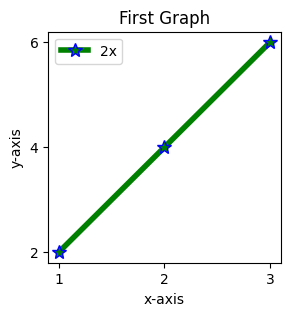

In [184]:
x = np.arange(1, 4, 1)
y = np.arange(2, 7, 2)

plt.figure(figsize=(3, 3))
plt.plot(x, y, label='2x', color="green", linewidth=4, marker='*', 
         markersize=10, markeredgecolor='blue', linestyle='-')

plt.title("First Graph", fontdict={'fontsize': 12})
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()

plt.xticks([1, 2, 3])
plt.yticks([2, 4, 6])

plt.show()

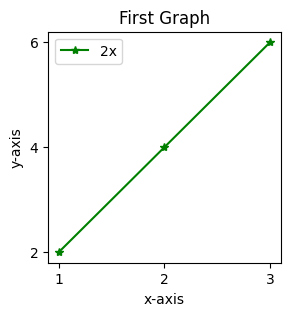

In [189]:
plt.figure(figsize=(3, 3))

# shorthand notation => fmt = '[color][marker][line]'
plt.plot(x, y, 'g*-', label='2x')

plt.title("First Graph", fontdict={'fontsize': 12})
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()

plt.xticks([1, 2, 3])
plt.yticks([2, 4, 6])

plt.show()


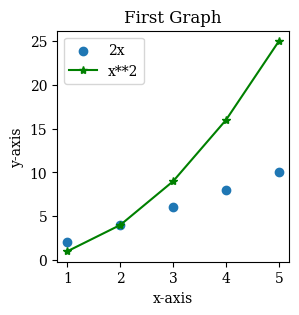

In [261]:
# Scatter and line plot

x = np.arange(1, 6, 1)
y = np.arange(2, 11, 2)

plt.figure(figsize=(3, 3), dpi=100)

plt.scatter(x, y, label='2x')
plt.plot(x, x**2, 'g*-', label='x**2')

plt.title("First Graph", fontdict={'fontsize': 12})
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()

# plt.savefig('graph.png', dpi=300)
plt.show()

In [204]:
gas = pd.read_csv('./data/gas_prices.csv')
gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


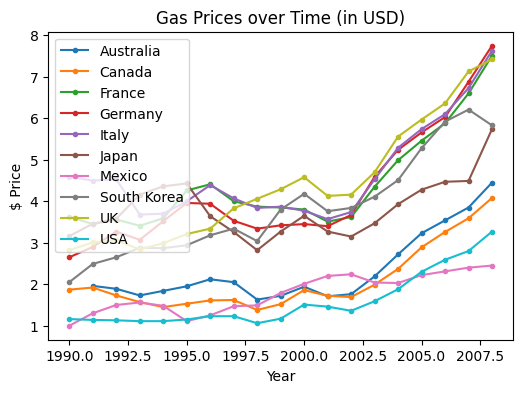

In [218]:
plt.figure(figsize=(6, 4))
plt.title('Gas Prices over Time (in USD)')

for country in gas.iloc[:, 1:]:
    plt.plot(gas.Year, gas[country], label=country, marker='.')

plt.xlabel('Year')
plt.ylabel('$ Price')
    
plt.legend(loc="upper left")
plt.show()

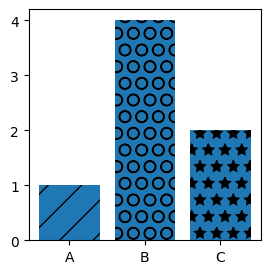

In [202]:
# Bar Chart
labels = ['A', 'B', 'C']
values = [1, 4, 2]

plt.figure(figsize=(3, 3))
bars = plt.bar(labels, values) # (x-axis, y-axis)
bars[0].set_hatch('/')
bars[1].set_hatch('O')
bars[2].set_hatch('*')

plt.show()

In [224]:
fifa = pd.read_csv("./data/fifa_data.csv")
fifa.drop("Unnamed: 0", axis=1, inplace=True)
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


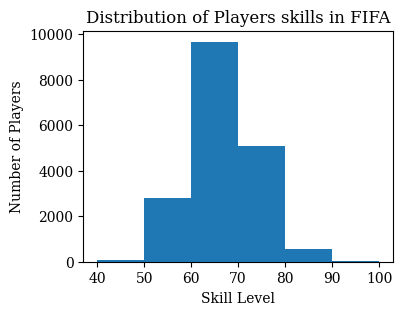

In [272]:
# Histogram
bins = np.arange((fifa.Overall.min())//10*10, ((fifa.Overall.max()//10)+1)*10+1, 10)

plt.figure(figsize=(4, 3))
plt.hist(fifa.Overall, bins=bins)
plt.xticks(bins)

plt.xlabel('Skill Level')
plt.ylabel('Number of Players')
plt.title('Distribution of Players skills in FIFA')

plt.show()

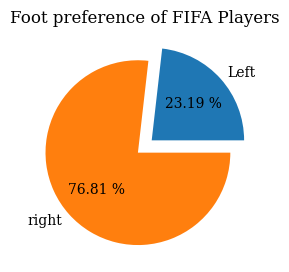

In [254]:
# Pie chart
left = fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot']=='Right'].count()[0]

plt.figure(figsize=(4, 3))
plt.pie([left, right], labels=['Left', 'right'], autopct='%.2f %%', explode=(0.1, 0.1))

plt.title('Foot preference of FIFA Players')
plt.show()

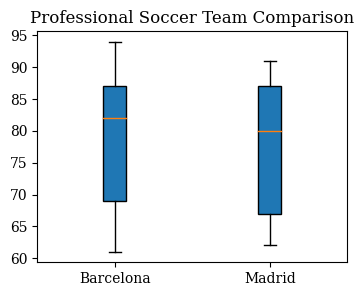

In [276]:
# Box Plot
barcelona = fifa[fifa.Club=='FC Barcelona']['Overall']
madrid = fifa[fifa.Club=='Real Madrid']['Overall']

plt.figure(figsize=(4, 3))
plt.boxplot([barcelona, madrid], labels=['Barcelona', 'Madrid'], patch_artist=True)
plt.title('Professional Soccer Team Comparison')
plt.show()

### **Seaborn**

In [280]:
sns.set_style('darkgird')
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


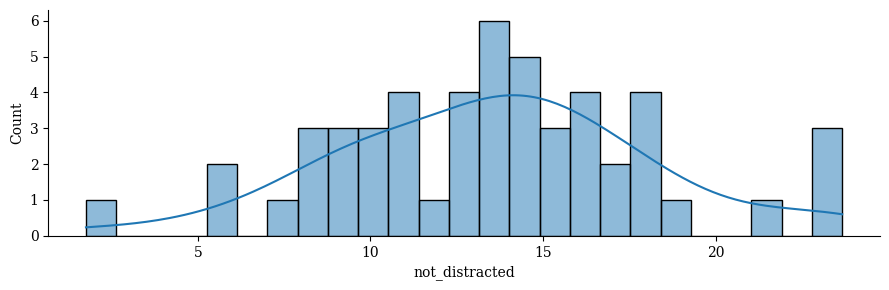

In [315]:
# Distribution plot 
sns.displot(crash_df['not_distracted'], kde=True, bins=25, height=3, aspect=3)
plt.show()

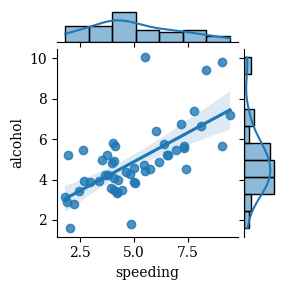

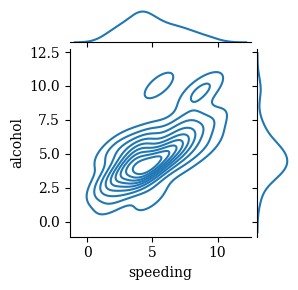

In [317]:
# Joint Plot
sns.jointplot(x='speeding', y='alcohol', data=crash_df, height=3, kind='reg')
sns.jointplot(x='speeding', y='alcohol', data=crash_df, height=3, kind='kde')
plt.show()

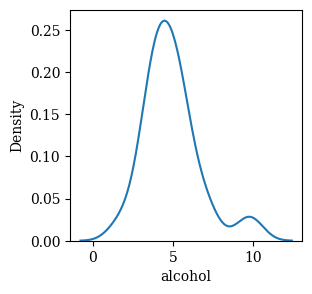

In [324]:
# kde plot
plt.figure(figsize=(3, 3))
sns.kdeplot(crash_df['alcohol'])
plt.show()

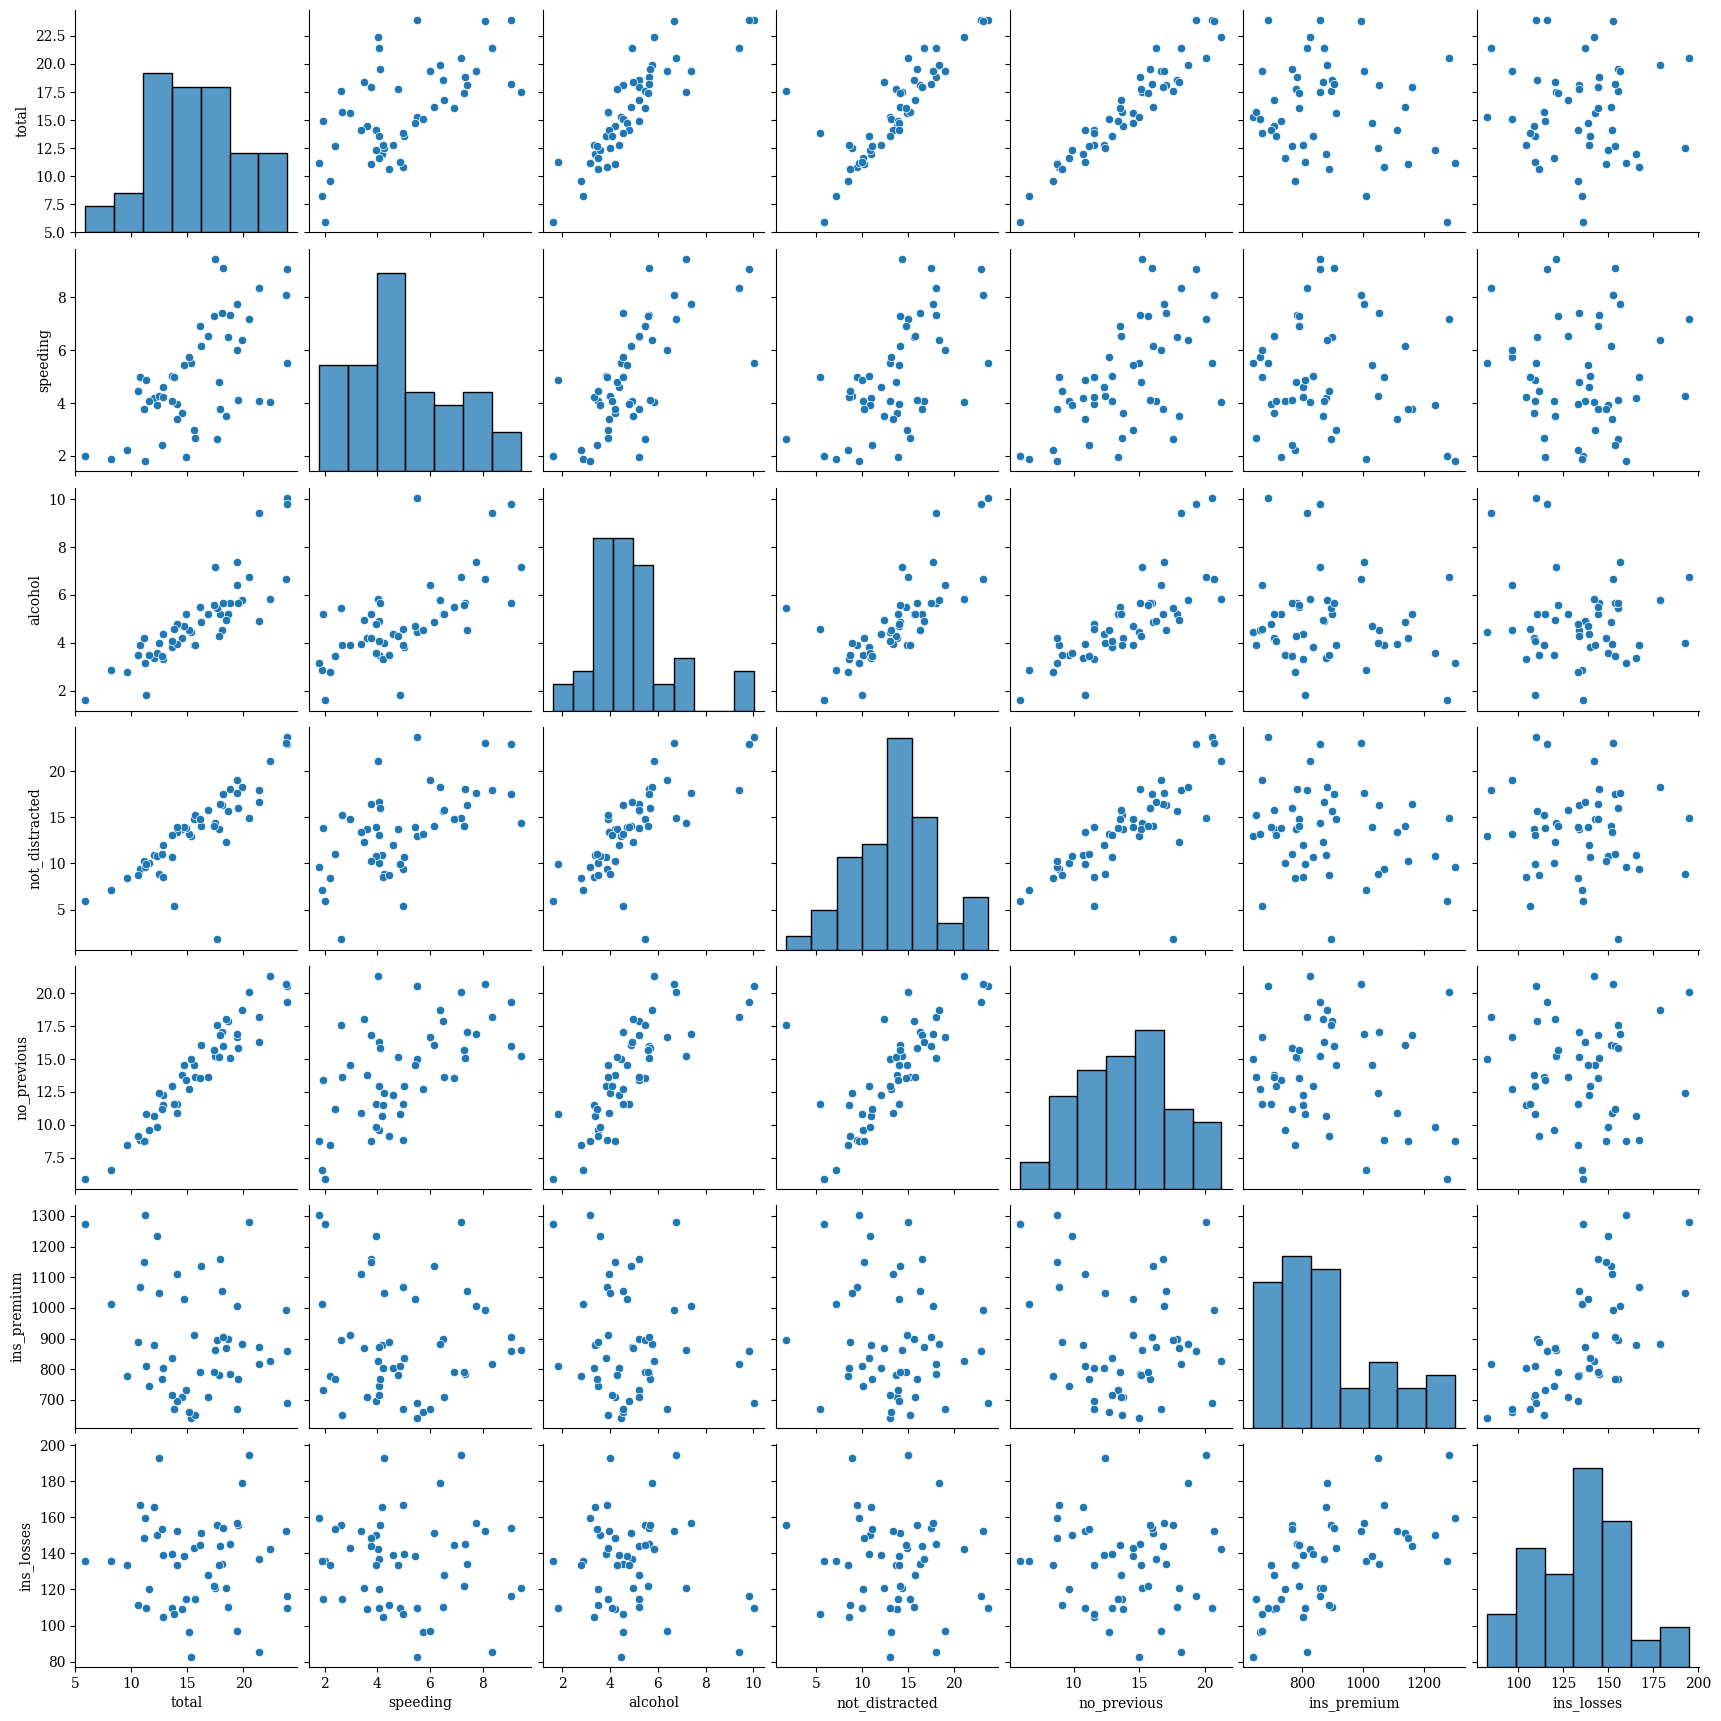

In [327]:
# pairplots
sns.pairplot(crash_df)  # hue=categorical data separation & palette='blues'
plt.show()

In [330]:
plots = """
Category Plots:
> sns.barplot(x='', y='', data=pd.DataFrame, estimator=np.func)
> sns.countplot(x='', data=pd.DataFrame)
> sns.boxplot(x='', y='', data=pd.DataFrame, hue='category')
> sns.violinplot(x='', y='', data=pd.DataFrame, hue='category', split=True)
> sns.stripplot(x='', y='', data=pd.DataFrame, jitter=True, hue='')
> sns.swarmplot(x='', y='', data=pd.DataFrame, hue='category')

Mx plots:
> sns.lmplot(x='', y='', hue='', data=pd.DataFrame, markers=[], scatter_kws={'s':100, 'linewidth':0.5})
for gird: -> like a matrix plot
    col=[]   
    row=[]
"""

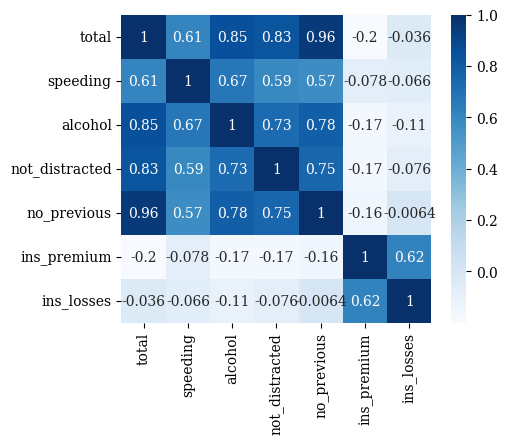

In [336]:
# Heatmap
mx = crash_df.corr(numeric_only=True)
plt.figure(figsize=(5, 4))
sns.heatmap(mx, annot=True, cmap="Blues")
plt.show()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


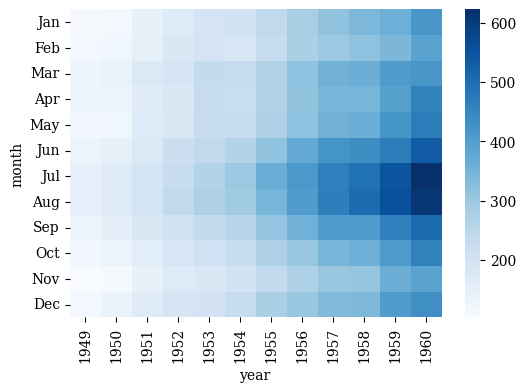

In [345]:
# pivot table
flights = sns.load_dataset('flights')
flights_pv = flights.pivot_table(index='month', columns='year', values='passengers')
display(flights_pv.head())

plt.figure(figsize=(6, 4))
sns.heatmap(flights_pv, cmap='Blues')
plt.show()

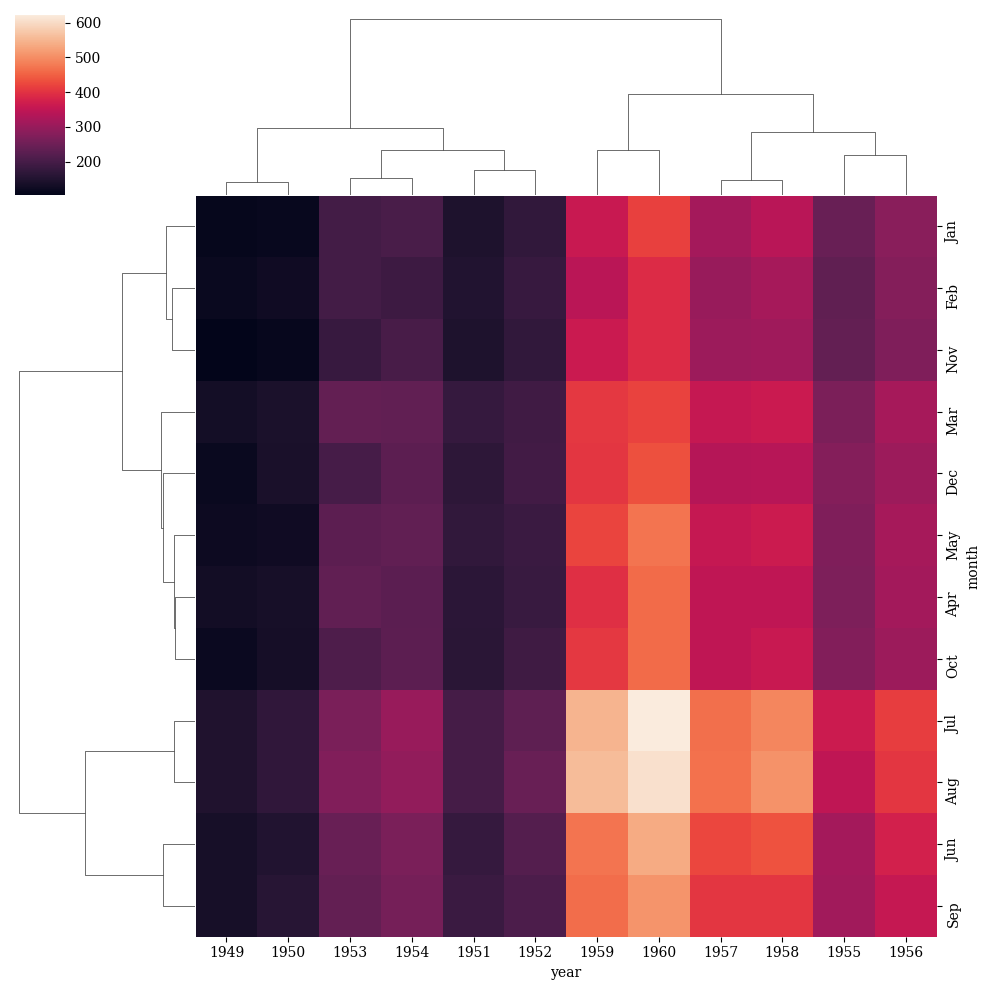

In [353]:
# cluster map
sns.clustermap(flights_pv)
plt.show()

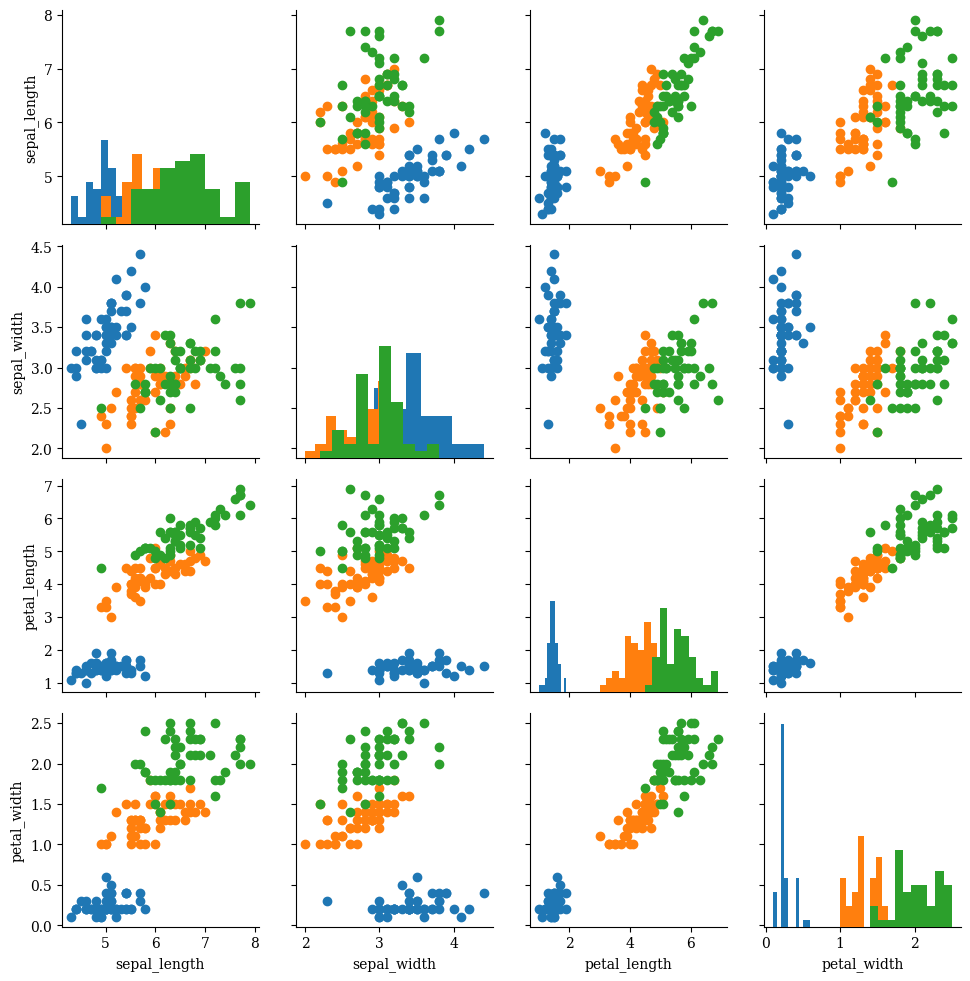

In [358]:
# pair grid
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)

"""
iris_g.map_upper()
    .map_lower()

iris_g = sns.PairGrid(iris, hue='', x_vars=[], y_vars=)
iris_g.map(plt.scatter)
"""

plt.show()



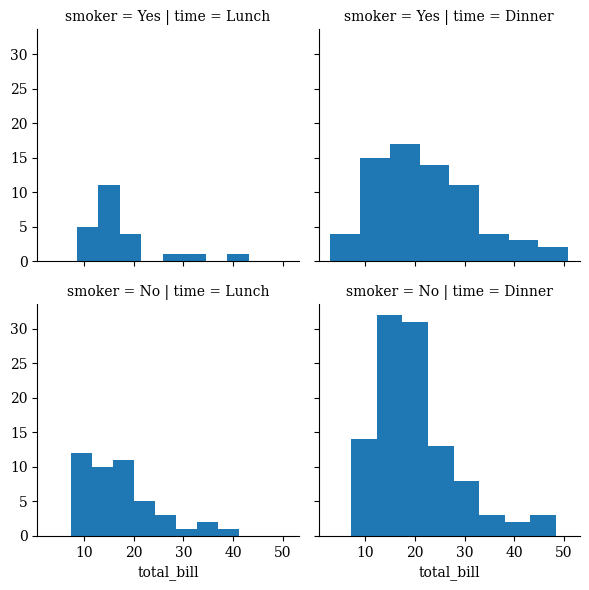

In [364]:
# Facet Grid
tips = sns.load_dataset('tips')
tips_fg = sns.FacetGrid(tips, col='time', row='smoker')
tips_fg.map(plt.hist, 'total_bill', bins=8)
plt.show()

## **Pandas**
<img src="https://mochablog.org/wp/wp-content/uploads/2020/05/Pandas_logo.png" width="350"/>
